# Integrated Project


## Project description


### Description of the data

    The dataset contains data on purchases made at the building-material retailer Home World. All of its customers have membership cards. Moreover, they can become members of the store's loyalty program for 20USD per month. The program  includes discounts, information on special offers, and gifts.
    
### Task

    Assess the performance of the chain's sales outlets.

- Carry out exploratory data analysis
- Assess the performance of the sales outlets
- Test statistical hypotheses
- Optional: visualize your findings
    
    File path:  retail_dataset_us.csv , product_codes_us.csv
    Presentation link: https://public.tableau.com/views/Finalproject_16283311193400/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link
    

### Project plan
1. [Prepare the Data](#introduction)
2. [Analyze Data](#introduction1)
3. [Statistical Tests](#introduction2)
4. [General conclusion](#introduction3)                

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math as mth
from scipy import stats as st


In [2]:
retail = pd.read_csv('https://code.s3.yandex.net/datasets/retail_dataset_us.csv',  parse_dates=['purchasedate'], sep="," )
product = pd.read_csv('https://code.s3.yandex.net/datasets/product_codes_us.csv',  sep=";" )

display(retail)
retail.info()


display(product)
product.info()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28
...,...,...,...,...,...,...,...
105330,538566,21826,1,2016-12-13 11:21:00,NaN,0,Shop 0
105331,540247,21742,0,2017-01-05 15:56:00,21143.0,0,Shop 24
105332,538068,85048,1,2016-12-09 14:05:00,23657.0,1,Shop 16
105333,538207,22818,11,2016-12-10 11:33:00,18427.0,0,Shop 29


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
purchaseid         105335 non-null object
item_ID            105335 non-null object
Quantity           105335 non-null int64
purchasedate       105335 non-null datetime64[ns]
CustomerID         69125 non-null float64
loyalty_program    105335 non-null int64
ShopID             105335 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.6+ MB


,productID,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42
...,...,...
3154,gift_0001_20,16.67
3155,gift_0001_30,25.00
3156,gift_0001_40,34.04
3157,gift_0001_50,42.55


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
productID        3159 non-null object
price_per_one    3159 non-null float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


## Prepare the Data <a name="introduction"></a>

In [3]:
print (retail.isnull().sum())
print (product.isnull().sum())


purchaseid             0
item_ID                0
Quantity               0
purchasedate           0
CustomerID         36210
loyalty_program        0
ShopID                 0
dtype: int64
productID        0
price_per_one    0
dtype: int64


There 36210 nan objects in 'CustomerID' column.

In [4]:
retail['CustomerID'].isnull().sum()/retail.shape[0]


0.3437603835382352

This nan values is 33% of date, its a big part of date, so I can not drop it. The missing data in the CustomerID column may be because the client did not want to share personal information or to make shop account.

In [ ]:
print (retail.isnull().sum())


In [6]:
print (retail.duplicated().sum()/retail.shape[0])
print (product.duplicated().sum()/product.shape[0])


0.009806806854321925
0.0


We can drop duplicate rows since they are around 1 % of data - 0.9 % in retail data.  So we drop it.

In [7]:
retail.drop_duplicates(inplace=True)

In [8]:
retail.head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28


In [9]:
product.head()

,productID,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


In [10]:
retail.rename(columns = {'item_ID': 'productID'}, inplace = True)

In [11]:
data = retail.merge(product, on='productID', how = 'left')

Conclusion :
- This nan values is 33% of date, but its a big number of date, so I can drop it for clearing results.
- We can drop duplicate rows since they are around 1 % of data - 1.4 % in retail data. So we drop it.
- We changed type of column 'purchasedate' to datatime.

## Analyze Data <a name="introduction1"></a>

In [12]:
data['total_usd']=data['price_per_one']*data['Quantity']

In [13]:
data[data.total_usd < -1000]

,purchaseid,productID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID,price_per_one,total_usd
8994,C545033,22838,-97,2017-02-25 16:26:00,19835.0,0,Shop 24,12.75,-1236.75
49166,C541433,23166,-74216,2017-01-18 10:17:00,18025.0,0,Shop 21,1.04,-77184.64


In [14]:
data[data.total_usd < 0]

,purchaseid,productID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID,price_per_one,total_usd
64,C539944,22776,-2,2016-12-23 11:38:00,20239.0,0,Shop 27,8.50,-17.00
112,C542426,22418,-25,2017-01-28 09:32:00,19825.0,0,Shop 27,0.85,-21.25
253,C539726,22791,-11,2016-12-21 14:24:00,22686.0,1,Shop 3,1.06,-11.66
344,C544034,21878,-2,2017-02-15 11:28:00,20380.0,0,Shop 9,0.72,-1.44
458,C539667,21285,-25,2016-12-21 10:47:00,18827.0,0,Shop 4,0.65,-16.25
...,...,...,...,...,...,...,...,...,...
104132,C541650,M,-2,2017-01-20 11:44:00,NaN,0,Shop 0,0.19,-0.38
104143,C540246,79320,-2,2017-01-05 15:43:00,18760.0,0,Shop 19,4.95,-9.90
104180,C539467,22801,-2,2016-12-19 12:46:00,20723.0,0,Shop 13,3.39,-6.78
104217,C540847,22197,-3,2017-01-11 17:35:00,19137.0,0,Shop 0,0.72,-2.16


All operations with "С" at the beginning of the number is a return.

In [15]:
Index_names = data[(data['purchaseid']=='C541433')|(data['purchaseid']=='541431')].index
data.drop(Index_names, inplace = True)

Purchase with id - C541433, 538526 have anormal quantity of items. 
so I drop it

In [16]:
data['purchasedate'].min()

Timestamp('2016-12-01 08:26:00')

In [17]:
data['purchasedate'].max()

Timestamp('2017-02-28 17:04:00')

In [18]:
data['purchasedate'].max()-retail['purchasedate'].min()\


Timedelta('89 days 08:38:00')

Timeline of data is from 2016-12-01 08:26:00 until 2017-02-28 17:01:00, was during for 89 days 08:35:00. 

In [19]:
data_shop=data.groupby('ShopID').purchaseid.count().sort_values(ascending=False)

print (data_shop.describe())
print(data_shop)


count       31.000000
mean      3364.516129
std       6490.609719
min       1650.000000
25%       1979.500000
50%       2274.000000
75%       2406.500000
max      38303.000000
Name: purchaseid, dtype: float64
ShopID
Shop 0     38303
Shop 1      2689
Shop 15     2678
Shop 24     2624
Shop 22     2538
Shop 5      2469
Shop 9      2447
Shop 13     2411
Shop 20     2402
Shop 14     2366
Shop 30     2359
Shop 7      2311
Shop 28     2306
Shop 26     2299
Shop 27     2296
Shop 11     2274
Shop 2      2224
Shop 19     2209
Shop 29     2181
Shop 10     2181
Shop 17     2164
Shop 23     2041
Shop 18     1995
Shop 4      1964
Shop 8      1963
Shop 16     1920
Shop 25     1902
Shop 12     1758
Shop 3      1703
Shop 6      1673
Shop 21     1650
Name: purchaseid, dtype: int64


In [20]:
data[data.ShopID=='Shop 0'].head()

,purchaseid,productID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID,price_per_one,total_usd
6,540468,22189,0,2017-01-07 13:55:00,NaN,0,Shop 0,2.31,0.00
7,541424,79321,1,2017-01-17 17:57:00,NaN,0,Shop 0,0.00,0.00
8,538883,22891,0,2016-12-14 15:56:00,NaN,0,Shop 0,3.75,0.00
11,541696,22197,4,2017-01-20 18:08:00,NaN,0,Shop 0,0.72,2.88
16,539744,22300,5,2016-12-21 15:21:00,NaN,0,Shop 0,0.00,0.00


In [21]:
data[data.ShopID=='Shop 0'].describe()

,Quantity,CustomerID,loyalty_program,price_per_one,total_usd
count,38303.000000,2351.000000,38303.000000,38303.000000,38303.000000
mean,2.216093,21019.495534,0.021852,1.885145,2.745779
std,40.348831,1825.837416,0.146202,2.639295,11.984595
min,-2601.000000,18026.000000,0.000000,0.000000,-61.250000
25%,0.000000,19521.000000,0.000000,0.420000,0.000000
50%,0.000000,20892.000000,0.000000,1.250000,0.000000
75%,2.000000,22605.000000,0.000000,2.460000,1.950000
max,5567.000000,23908.000000,1.000000,125.000000,643.670000


In [22]:
index_names = data[data.ShopID=='Shop 0'].index
data.drop(index_names, inplace = True)


Shop 0 is a custumers with not ID. This data does not contain information that is useful to us, so i drop it.

Sales are evenly distributed among the other shops.

In [24]:
data_shop_return=data[data.total_usd < 0].groupby('ShopID').purchaseid.count().sort_values(ascending=False)
(data_shop_return / data_shop).sort_values(ascending=False)

ShopID
Shop 10    0.033929
Shop 6     0.031680
Shop 27    0.028310
Shop 17    0.026340
Shop 24    0.025915
Shop 19    0.025804
Shop 16    0.025521
Shop 22    0.025217
Shop 28    0.025152
Shop 23    0.024988
Shop 4     0.022403
Shop 18    0.022055
Shop 29    0.021091
Shop 7     0.020338
Shop 9     0.020025
Shop 12    0.019909
Shop 8     0.019868
Shop 21    0.018788
Shop 11    0.018030
Shop 13    0.017835
Shop 26    0.017399
Shop 2     0.016187
Shop 15    0.015310
Shop 30    0.015261
Shop 25    0.014196
Shop 14    0.013948
Shop 5     0.012961
Shop 20    0.012073
Shop 1     0.011900
Shop 3     0.011157
Shop 0          NaN
Name: purchaseid, dtype: float64

Most returns are in Shop 10, 6, 27, 17.

CustomerID
18427.0    773
20285.0    745
20990.0    714
20590.0    549
20325.0    468
Name: purchaseid, dtype: int64


count    1132.000000
mean       38.185512
std        60.298455
min         1.000000
25%        10.000000
50%        21.500000
75%        44.000000
max       773.000000
Name: purchaseid, dtype: float64

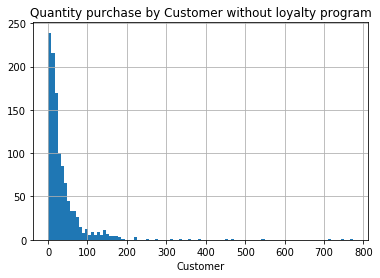

In [25]:
data_customer=data[data.loyalty_program==0].groupby('CustomerID').purchaseid.count().sort_values(ascending=False)
print(data_customer.head())
data_customer.hist(bins=100)
plt.title('Quantity purchase by Customer without loyalty program')
plt.xlabel("Customer")
data_customer.describe()


CustomerID
23520.0    717
23529.0    308
23797.0    287
23190.0    251
23490.0    249
Name: purchaseid, dtype: int64


count    576.000000
mean      39.192708
std       50.397060
min        1.000000
25%       11.000000
50%       25.000000
75%       51.000000
max      717.000000
Name: purchaseid, dtype: float64

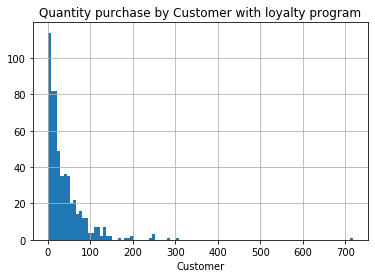

In [26]:
data_customer=data[data.loyalty_program==1].groupby('CustomerID').purchaseid.count().sort_values(ascending=False)
print(data_customer.head())
data_customer.hist(bins=100)
plt.title('Quantity purchase by Customer with loyalty program')
plt.xlabel("Customer")
data_customer.describe()

The avarange quantity purchase by customer - 23.

The larggest number of purchases made Customer with id : 18427 - 774 purchases.

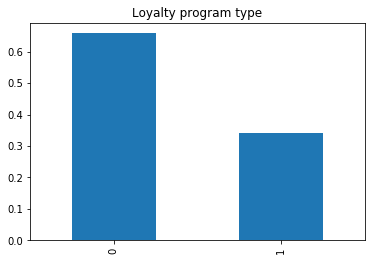

In [27]:
data['loyalty_program'].value_counts(normalize= True).plot(kind='bar', title='Loyalty program type')
plt.show()



Non loyalty program have the most proportions of purchase.

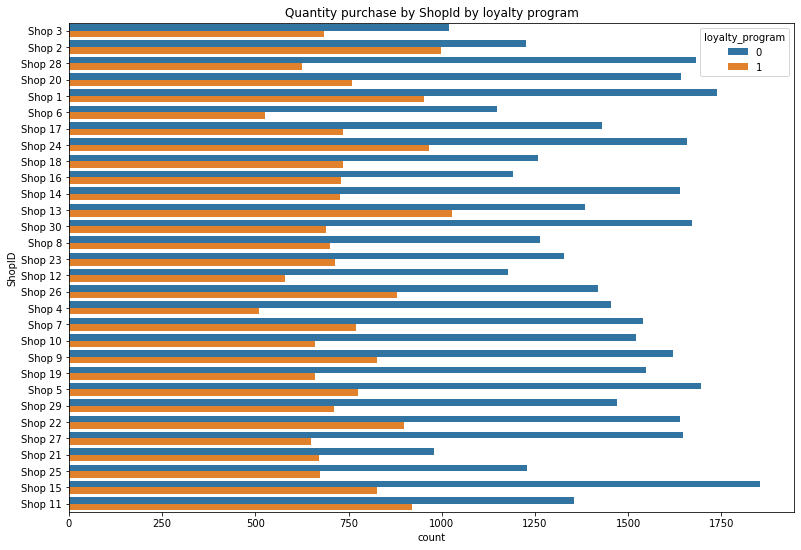

In [28]:
plt.figure(figsize=(13,9))
sns.countplot(y="ShopID", hue="loyalty_program", data=data)

plt.title('Quantity purchase by ShopId by loyalty program')
plt.show()

In all stores, the proportion of non-loyalty_program customers is greater.

In [29]:
data_shop_return

ShopID
Shop 10    74
Shop 24    68
Shop 27    65
Shop 22    64
Shop 28    58
Shop 17    57
Shop 19    57
Shop 6     53
Shop 23    51
Shop 16    49
Shop 9     49
Shop 7     47
Shop 29    46
Shop 18    44
Shop 4     44
Shop 13    43
Shop 11    41
Shop 15    41
Shop 26    40
Shop 8     39
Shop 30    36
Shop 2     36
Shop 12    35
Shop 14    33
Shop 5     32
Shop 1     32
Shop 21    31
Shop 20    29
Shop 25    27
Shop 3     19
Name: purchaseid, dtype: int64

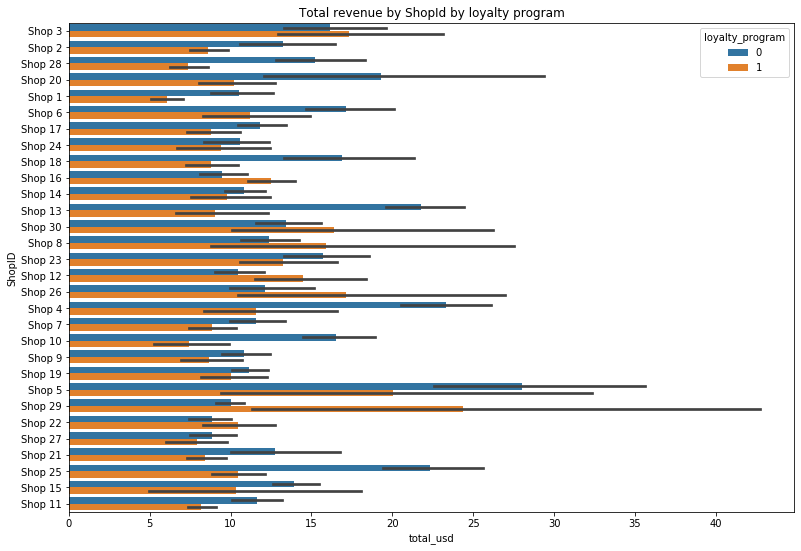

In [30]:
plt.figure(figsize=(13,9))
sns.barplot(x="total_usd", y="ShopID", hue="loyalty_program", data=data)
plt.title('Total revenue by ShopId by loyalty program')

plt.show()


In [31]:
data.groupby('ShopID').total_usd.sum().sort_values(ascending=False)


ShopID
Shop 5     63046.14
Shop 4     39778.52
Shop 20    39468.26
Shop 13    39407.76
Shop 25    34496.92
Shop 15    34355.27
Shop 30    33726.79
Shop 26    32258.18
Shop 29    32034.20
Shop 23    30360.23
Shop 28    30217.95
Shop 10    30002.04
Shop 3     28301.64
Shop 18    27709.57
Shop 8     26704.05
Shop 24    26604.29
Shop 6     25571.90
Shop 14    24811.34
Shop 2     24798.92
Shop 9     24725.67
Shop 7     24597.39
Shop 1     24043.83
Shop 22    23911.13
Shop 19    23844.42
Shop 17    23326.33
Shop 11    23264.34
Shop 12    20727.31
Shop 16    20361.03
Shop 27    19710.59
Shop 21    18110.55
Name: total_usd, dtype: float64

In [32]:
data.groupby(['loyalty_program']).mean()

,Quantity,CustomerID,price_per_one,total_usd
loyalty_program,,,,
0,11.839505,19947.256674,2.190314,14.175768
1,9.888682,23047.707597,2.132469,11.284003


Customers without loyalty program buy more Quantity of products and more spend money.

In [184]:
data.to_csv('tableau.csv')



## Statistical Tests <a name="introduction2"></a>


In [33]:
from scipy import stats as st


In [34]:
data.groupby('loyalty_program').total_usd.describe()


,count,mean,std,min,25%,50%,75%,max
loyalty_program,,,,,,,,
0,43422.0,14.175768,60.932687,-1236.75,0.0,6.48,13.4125,6537.30
1,22575.0,11.284003,72.960571,-589.05,0.0,2.75,10.1500,3821.62


H0: average profits total usd for loyalty program customers = average profits total usd for non loyalty program customers

H1: average profits total usd for loyalty program customers <> average profits total usd for non loyalty program customers

If p_value < alpha, then reject null hypothesis. If p_value > alpha, fail to reject null hypothesis.

In [35]:
st.ttest_ind(data[data.loyalty_program==1].total_usd, data[data.loyalty_program==0].total_usd, equal_var = False)


Ttest_indResult(statistic=-5.101554255258241, pvalue=3.384425385035468e-07)

 p > 0.05 - Null hypothesis confirmed; there's not a statistically significant difference in average profits total usd between loyalty program customers and non loyalty program customers;

## General conclusion <a name="introduction3"></a>

- Shop 0 is a custumers with not ID. This data does not contain information that is useful to us, so i drop it.
- Timeline of data is from 2016-12-01 08:26:00 until 2017-02-28 17:01:00, was during for 89 days 08:35:00. 
- Most returns are in Shop 10, 6, 27, 17.
- Sales are evenly distributed among the other shops.
- Customers with loyalty program buy more Quantity of products and more spend money.
- The mean quantity purchase by customer - 23.
- The larggest number of purchases made Customer with id : 18427 - 774 purchases.
- In all stores, the proportion of non-loyalty_program customers is greater.
- Customers without loyalty program buy more Quantity of products and more spend money.
- The result statistical tests: there's not a statistically significant difference in average profits total usd between loyalty program customers and non loyalty program customers;

    Recommendations:

    I don’t see some reason to give loyal programm to customer. It not really affect on count of purchase or sum of money that customers spend.

Tableau link: https://public.tableau.com/views/Finalproject_16283311193400/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

Link for presintation: https://drive.google.com/drive/folders/1mxVmtqrcwRT1o_Y7SZ4gaZPkD0n3eQdb?usp=sharing